**Challenge Set 5**
<br>-Hasan Haq

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline

**Challenge 1**

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [3]:
df = pd.read_csv('data/2013_movies.csv')

In [4]:
y1 = df['DomesticTotalGross']
x1 = np.ones((len(y1),1))

Model results are below.  It does not predict anything because there is no relationship between X and Y.  It only plots the intersection between Domestic Total Gross and the horizontal line at Y=1, which comes out to 1.006E8.

In [5]:
lsm = sm.OLS(y1,x1)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 07 Feb 2017   Prob (F-statistic):                nan
Time:                        11:39:27   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
x_pred = list(range(1,101))
y_pred = [fit.params[0] for i in x_pred]

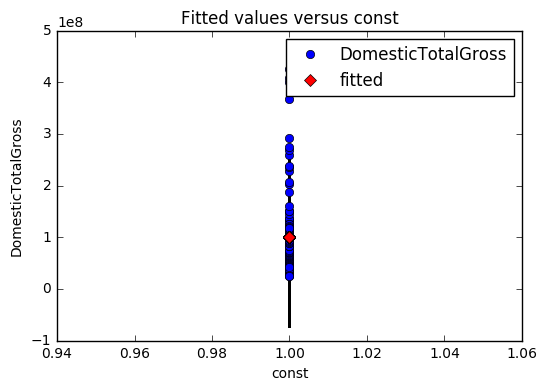

In [7]:
plt.figure();
sm.graphics.plot_fit(fit, 0);
plt.show();

Residuals are skewed right

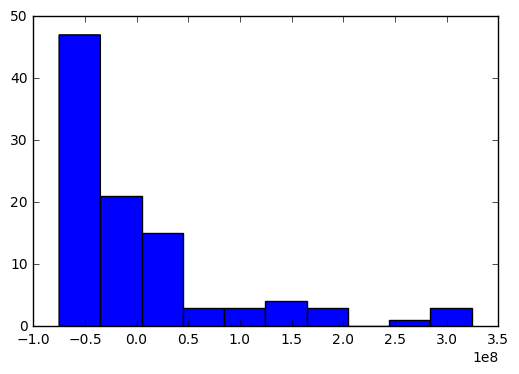

In [8]:
plt.hist(fit.resid);

**Challenge 2**

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [9]:
y2 = df['DomesticTotalGross']
x2_1 = np.ones((len(y2),1))
x2_2 = list(range(1,101,1))
x2_2 = list(map(lambda x: x/100, x2_2))
x2_2 = np.asarray(x2_2).reshape(len(x2_2),1)

df_2 = pd.DataFrame(x2_1, columns=['x2_1'])
df_2['x2_2'] = x2_2

In [10]:
lsm2 = sm.OLS(y2, df_2)
fit2 = lsm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     221.8
Date:                Tue, 07 Feb 2017   Prob (F-statistic):           6.48e-27
Time:                        11:39:28   Log-Likelihood:                -1910.8
No. Observations:                 100   AIC:                             3826.
Df Residuals:                      98   BIC:                             3831.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x2_1        2.273e+08    9.8e+06     23.198      0.000      2.08e+08  2.47e+08
x2_2       -2.509e+08   1.68e+07    -14.894      0.000     -2.84e+08 -2.17e+08
==============================================================================
Omnibus:                       59.032   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.284
Skew:                           2.105   Prob(JB):                     1.19e-44
Kurtosis:                       8.552   Cond. No.                         4.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By including the continuous variable of .01 to 1, we have effectively ranked the DomesticTotalGross data, graphed it according to percentiles, and fit a best fit line according to its ranking.

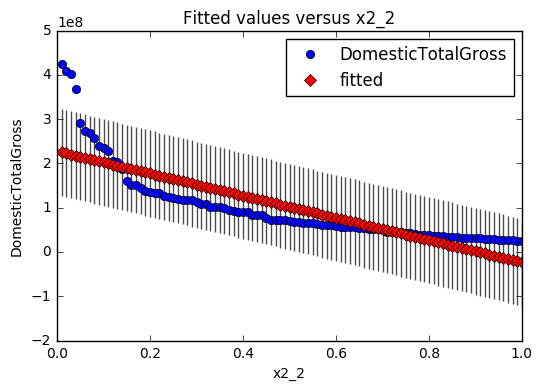

In [11]:
plt.figure()
sm.graphics.plot_fit(fit2, 1)
plt.show();

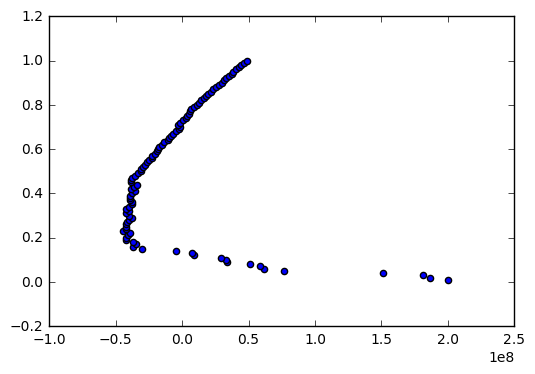

In [12]:
plt.scatter(fit2.resid, x2_2);

**Challenge 3**

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?



In [13]:
y3 = df['DomesticTotalGross']
genres = ['Action', 'Comedy', 'Drama', 'Romance', 'Scifi']
x3_1 = np.ones((len(y2),1))
x3_2 = [genres[np.random.randint(1,6)-1] for x in list(range(len(y3)))]
df_dum = pd.get_dummies(x3_2, drop_first=True)
df_dum['int'] = x3_1

The p-values for the "Genre" dummy variables indicate that there is not strong evidence to support that the coefficient is != 0.  This makes sense because we randomly assigned these categories to each datapoint.  While the "Drama" category actually has a MUCH lower p-value than the rest, clearly there is no fundamental basis for this. 

In [14]:
lsm3 = sm.OLS(y3, df_dum)
fit3 = lsm3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.3395
Date:                Tue, 07 Feb 2017   Prob (F-statistic):              0.851
Time:                        11:39:29   Log-Likelihood:                -1969.3
No. Observations:                 100   AIC:                             3949.
Df Residuals:                      95   BIC:                             3962.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Comedy     -1.616e+07   2.89e+07     -0.559      0.577     -7.35e+07  4.12e+07
Drama       1.649e+07      3e+07      0.550      0.583      -4.3e+07   7.6e+07
Romance     6.167e+05   2.86e+07      0.022      0.983     -5.62e+07  5.74e+07
Scifi       3.662e+06   2.86e+07      0.128      0.898     -5.31e+07  6.05e+07
int         1.001e+08   2.15e+07      4.658      0.000      5.74e+07  1.43e+08
==============================================================================
Omnibus:                       47.678   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.563
Skew:                           1.886   Prob(JB):                     2.67e-24
Kurtosis:                       6.440   Cond. No.                         6.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Challenge 4**

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [15]:
y4 = np.log(y3)
lsm4 = sm.OLS(y4, df_dum)
fit4 = lsm3.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.3395
Date:                Tue, 07 Feb 2017   Prob (F-statistic):              0.851
Time:                        11:39:29   Log-Likelihood:                -1969.3
No. Observations:                 100   AIC:                             3949.
Df Residuals:                      95   BIC:                             3962.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Comedy     -1.616e+07   2.89e+07     -0.559      0.577     -7.35e+07  4.12e+07
Drama       1.649e+07      3e+07      0.550      0.583      -4.3e+07   7.6e+07
Romance     6.167e+05   2.86e+07      0.022      0.983     -5.62e+07  5.74e+07
Scifi       3.662e+06   2.86e+07      0.128      0.898     -5.31e+07  6.05e+07
int         1.001e+08   2.15e+07      4.658      0.000      5.74e+07  1.43e+08
==============================================================================
Omnibus:                       47.678   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.563
Skew:                           1.886   Prob(JB):                     2.67e-24
Kurtosis:                       6.440   Cond. No.                         6.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Challenge 5**

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [23]:
lr1 = make_pipeline(LinearRegression())
lr1.fit(df_dum, y3)
X_train, X_test, y_train, y_test = train_test_split(df_dum, y3, test_size=.25)
lr1.fit(X_train, y_train)
lr1.score(X_test, y_test)

-0.043897080114527087